In [1]:
from dataset.Norm2dDataset import Norm2dDataset, Norm2dParameter
from sklearn.linear_model import LogisticRegression
from evaluator.visualize import joinplot
import seaborn as sns
import matplotlib.pyplot as plt
from models.logistic_regression import LogisticRegression
import warnings
warnings.simplefilter("ignore")

# create dataset

# modeling

## 完全分離

In [1]:
param1 =  {"myu":[10,10], "sigma": [[1,0],[0,1]], "samples": 1000}
param2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
dataset = Norm2dDataset((param1, param2))

param = {"penalty":"l2"}
model = LogisticRegression(param)
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

NameError: name 'Norm2dDataset' is not defined

## 一部重なり

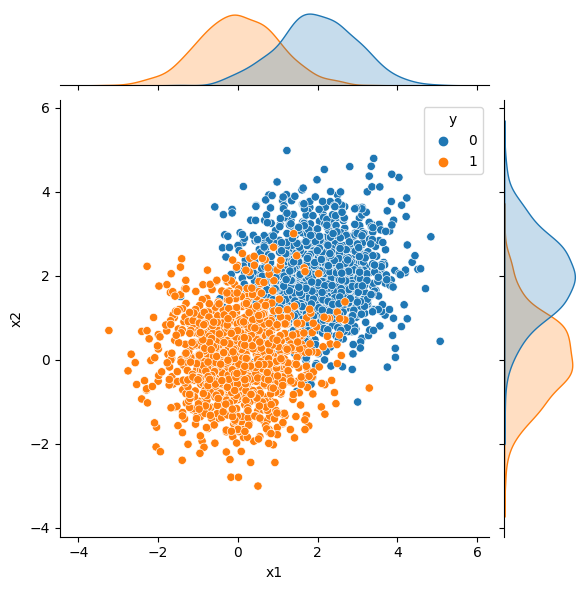

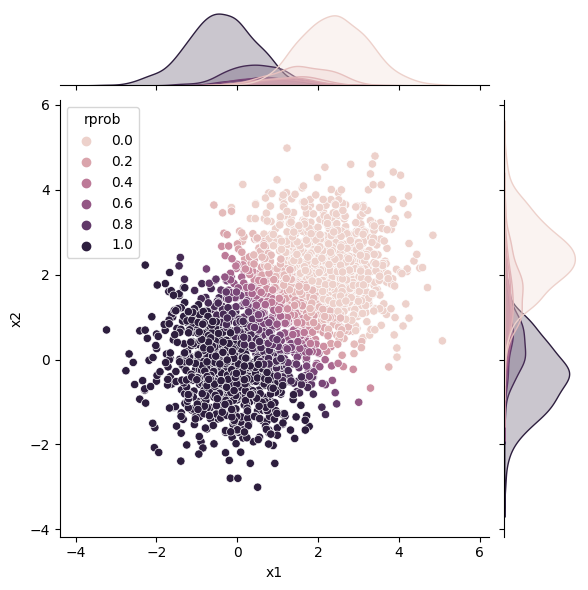

In [3]:
param1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "samples": 1000}
param2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}

dataset = Norm2dDataset((param1, param2))

param = {"penalty":"l2"}
model = LogisticRegression(param)
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

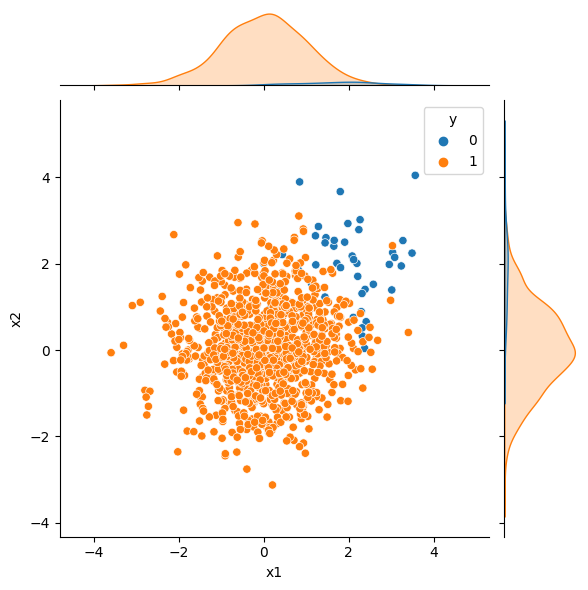

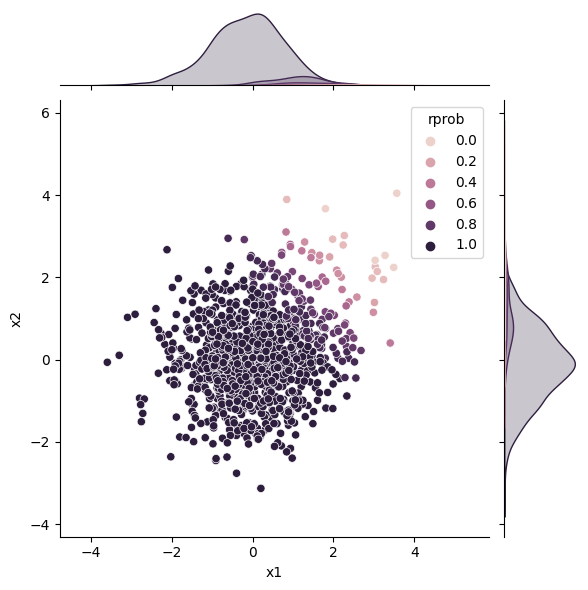

In [4]:
param1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "samples": 50}
param2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
dataset = Norm2dDataset((param1, param2))

param = {"penalty":"l2"}
model = LogisticRegression(param)
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

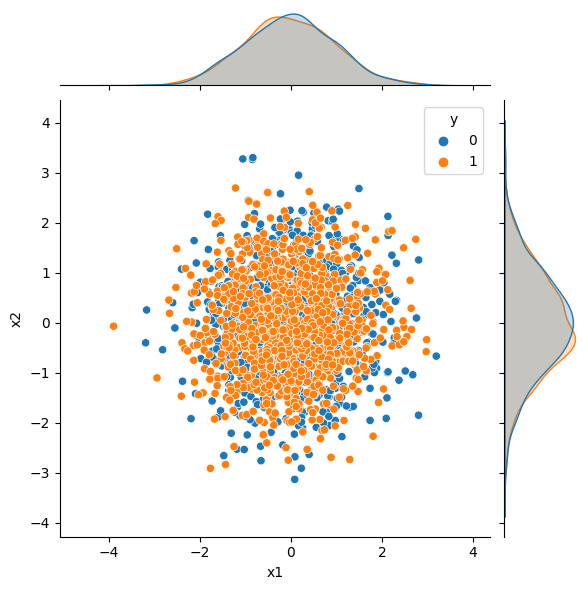

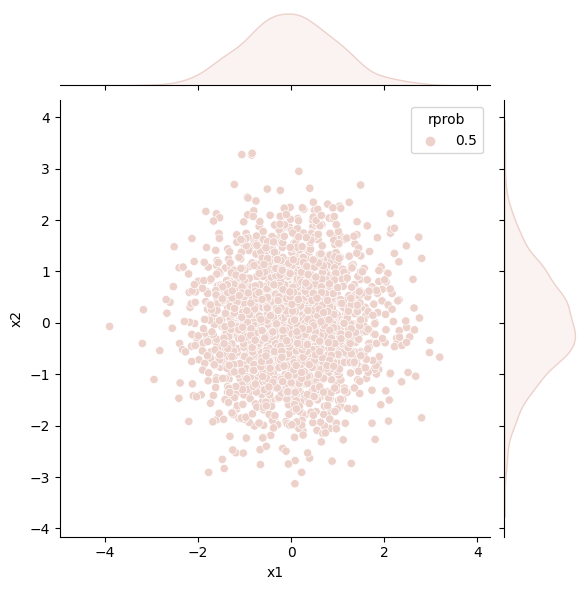

In [5]:
param1 =  {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples":1000}
param2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}

dataset = Norm2dDataset((param1, param2))

param = {"penalty":"l2"}
model = LogisticRegression(param)
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

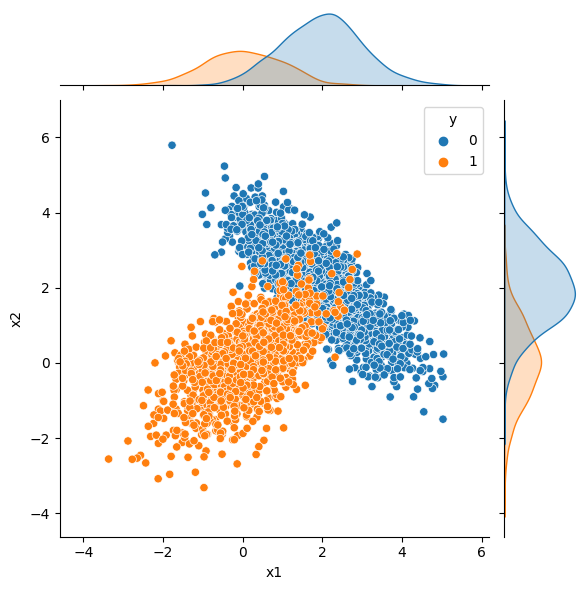

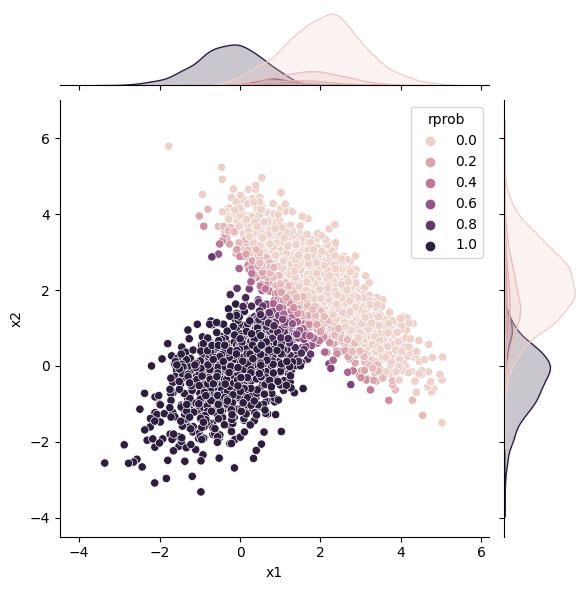

In [6]:
param1 =  {"myu":[2,2], "sigma": [[1,-0.8],[-0.8,1]], "samples":2000}
param2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "samples": 1000}

dataset = Norm2dDataset((param1, param2))

param = {"penalty":"l2"}
model = LogisticRegression(param)
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

## random forest

In [7]:
def predict_random_forest(df, x1, x2, y):
    rf = RandomForestClassifier()
    rf.fit(df[[x1,x2]], df[y])    
    df["prob"] = rf.predict_proba(df[[x1, x2]])[:,0]    
    df["rprob"] = df["prob"].round(1)
        
    sns.jointplot(data = df,x = x1, y = x2, hue= "rprob")
    return df

In [23]:
from models.random_forest import RandomForest


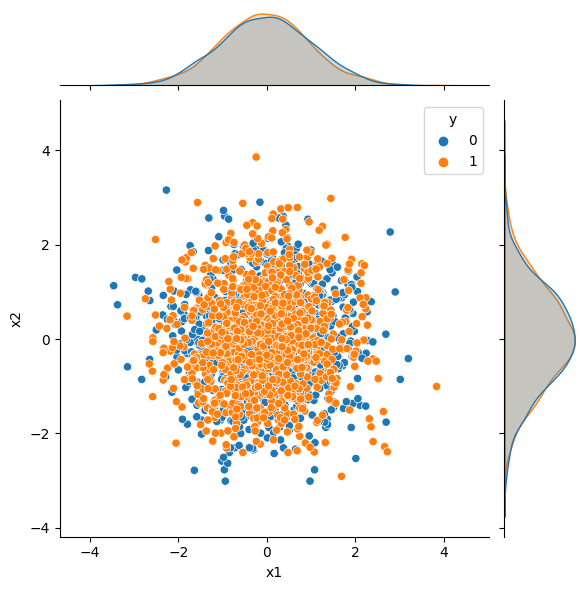

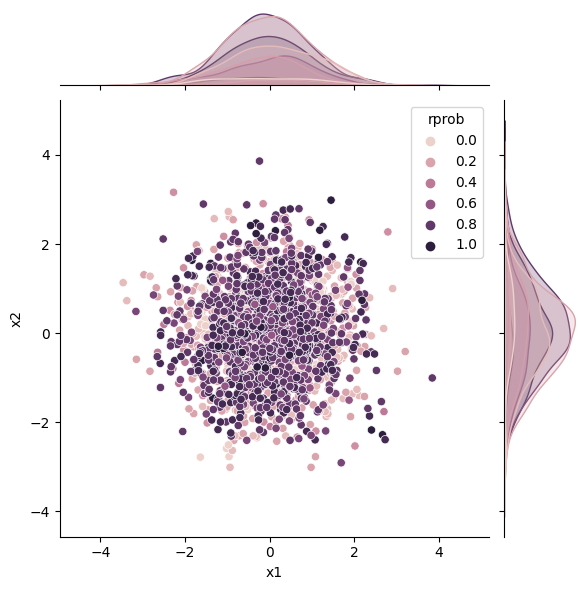

In [27]:
param1 =  {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples":1000}
param2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}

dataset = Norm2dDataset((param1, param2))
model = RandomForest({"cuda": False})
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

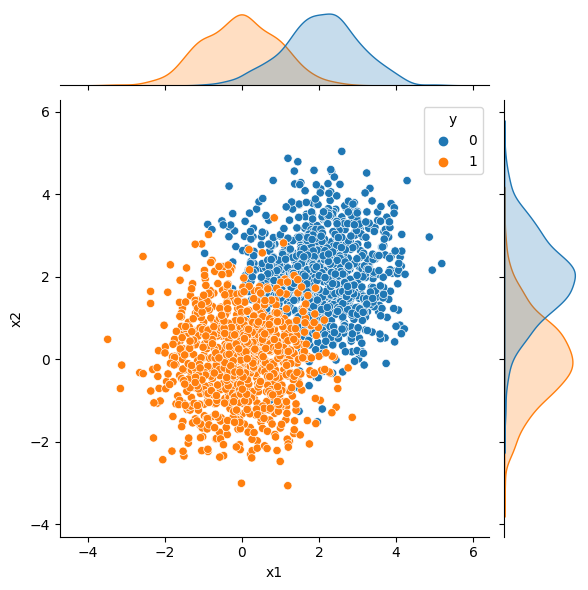

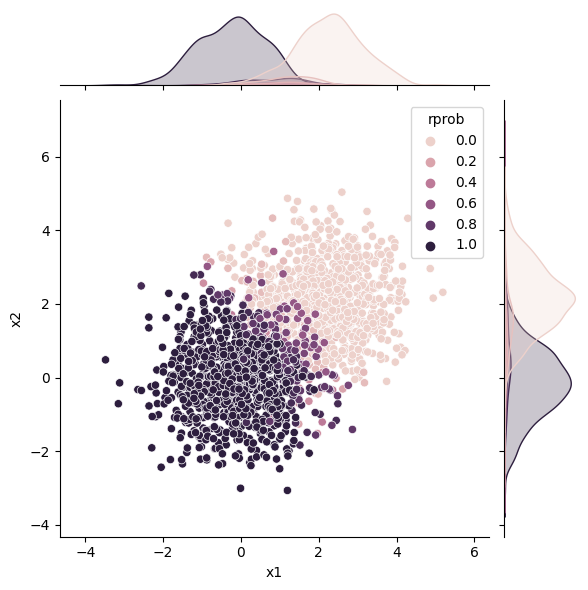

In [26]:
param1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "samples": 1000}
param2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
dataset = Norm2dDataset((param1, param2))
model = RandomForest({"cuda": False})
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

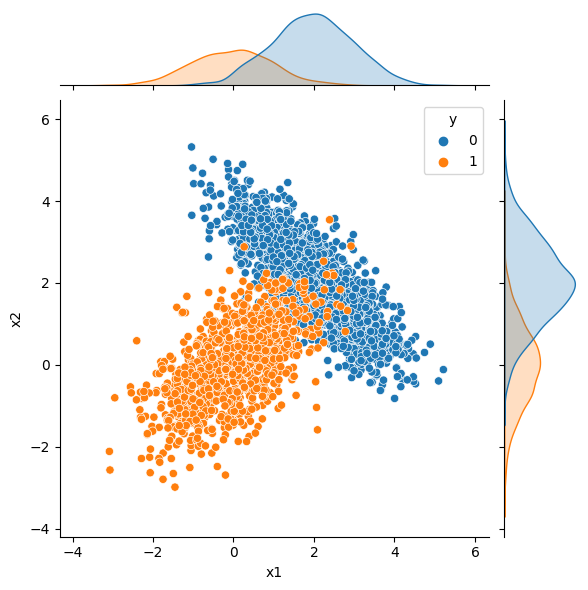

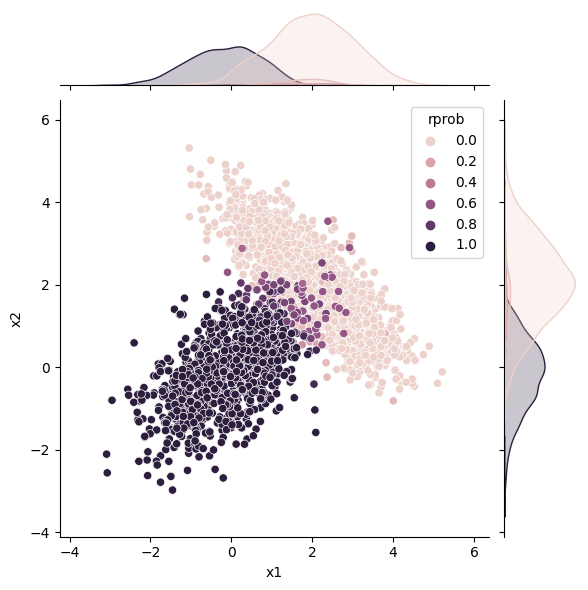

In [28]:
param1 =  {"myu":[2,2], "sigma": [[1,-0.8],[-0.8,1]], "samples":2000}
param2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "samples": 1000}
dataset = Norm2dDataset((param1, param2))
model = RandomForest({"cuda": False})
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

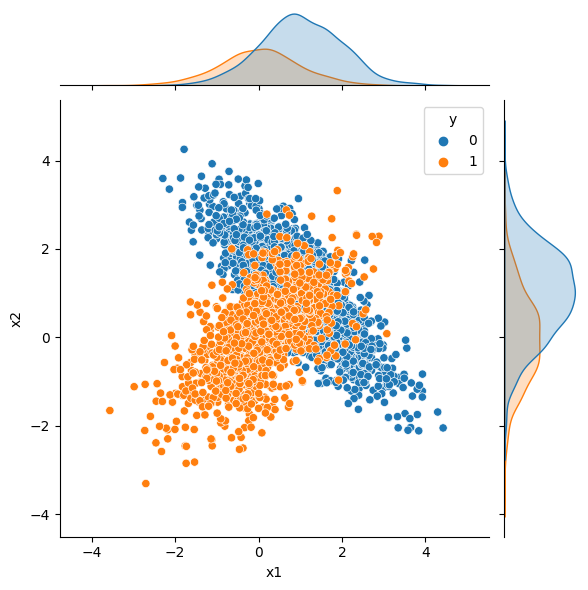

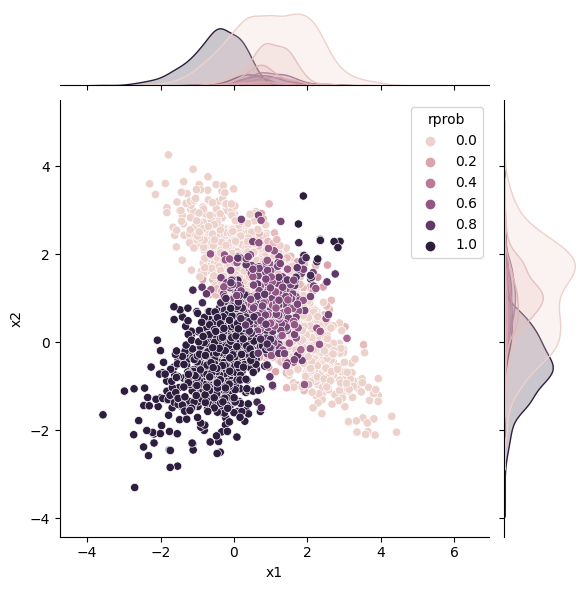

In [31]:
param1 =  {"myu":[1,1], "sigma": [[1,-0.8],[-0.8,1]], "samples":2000}
param2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "samples": 1000}

dataset = Norm2dDataset((param1, param2))
model = RandomForest({"cuda": False})
model.train(dataset.X, dataset.Y)
dataset["rprob"] = model.predict_proba(dataset.X)[:,1].round(1)

joinplot(dataset, hue = "y")
joinplot(dataset, hue = "rprob")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 1)        
        self.F = F.relu
        self.sigmoid = F.sigmoid

    def forward(self, x):
        x = self.F(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)
    
def fit(model, x, y):
    criterion = nn.BCELoss().cuda()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

    for i in tqdm(range(3000)):
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
def predict(model, x):
    with torch.no_grad():
        pred = model(x)
    return pred

def predict_MLP(df, x1,x2, y):
    model = MLP(2).cuda()
    
    X = torch.from_numpy(df[[x1, x2]].values).cuda().float()
    y = torch.from_numpy(df[["y"]].astype(float).values).cuda().float()
    
    fit(model, X, y)
    
    df["prob"] = predict(model, X).cpu()
    df["rprob"] = df["prob"].round(1)
    sns.jointplot(data = df,x = "x1", y = "x2", hue= "rprob")
    return df

In [ ]:
params1 =  {"myu":[1,1], "sigma": [[0.1,-0.08],[-0.08,0.1]], "size":1000}
params2 = {"myu":[-1,-1], "sigma": [[0.1,0.06],[0.06,0.1]], "size": 1000}
df = create_df(params1, params2);
df = predict_MLP(df, "x1", "x2", "y")

In [ ]:
kyo1 = 0
kyo2 = 0
params1 =  {"myu":[0,0], "sigma": [[0.1,kyo1],[kyo1,0.1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[0.1,kyo2],[kyo2,0.1]], "size": 1000}
df = create_df(params1, params2);
df = predict_MLP(df, "x1", "x2", "y")

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())

In [ ]:
params1 =  {"myu":[1,1], "sigma": [[1,-0.8],[-0.8,1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())

In [ ]:
params1 =  {"myu":[0.05,0.05], "sigma": [[10,0.5],[0.5,10]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0.5],[0.5,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())